# Probability of Type I and II errors
From [these notes (University of Northern Iowa)](http://www.cs.uni.edu/~campbell/stat/inf5.html).

# References
- [Confusing statistical terms: alpha and beta](https://www.theanalysisfactor.com/confusing-statistical-terms-1-alpha-and-beta/) (theanalysisfactor.com)

--- 
tags: statistics, type I error, type II error

# Imports

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# Type I error 
>A type I error occurs when one rejects the null hypothesis when it is true. The probability of a type I error is the level of significance of the test of hypothesis, and is denoted by *alpha*. Usually a one-tailed test of hypothesis is is used when one talks about type I error. 

# Remark
Note that here we use the actual population statistics (mean and standard deviation) since we are not calculating test statistics, but rather calculating the probability of an error occurring.

# Example 1 
> If the cholesterol level of healthy men is normally distributed with a mean of 180 and a standard deviation of 20, and men with cholesterol levels over 225 are diagnosed as not healthy, what is the probability of a type one error?
z=(225-180)/20=2.25; the corresponding tail area is .0122, which is the probability of a type I error.

Verification:

In [2]:
mu0 = 180 # population mean
sigma = 20 # population standard deviation
sample = 225 # sample weight
z = (sample - mu0)/sigma # z-statistic
p = stats.norm.sf(z) # probability of type I error
print(f"Probability of misdiagnosed healthy patient (type I error): alpha={p:.2%}")

Probability of misdiagnosed healthy patient (type I error): alpha=1.22%


# Example 2
> If the cholesterol level of healthy men is normally distributed with a mean of 180 and a standard deviation of 20, at what level (in excess of 180) should men be diagnosed as not healthy if you want the probability of a type one error to be 2%?
2% in the tail corresponds to a z-score of 2.05; 2.05 × 20 = 41; 180 + 41 = 221.

Verification:

In [3]:
mu0 = 180
sigma = 20
p = .02
z = stats.norm.isf(p)
w = mu0 + sigma*z
print(f"Critical weight: {w:.0f}")

Critical weight: 221


# Type II error
> A type II error occurs when one rejects the alternative hypothesis (fails to reject the null hypothesis) when the alternative hypothesis is true. The probability of a type II error is denoted by *beta*. One cannot evaluate the probability of a type II error when the alternative hypothesis is of the form µ > 180, but often the alternative hypothesis is a competing hypothesis of the form: the mean of the alternative population is 300 with a standard deviation of 30, in which case one can calculate the probability of a type II error. 

# Example 1
> If men predisposed to heart disease have a mean cholesterol level of 300 with a standard deviation of 30, but only men with a cholesterol level over 225 are diagnosed as predisposed to heart disease, what is the probability of a type II error (the null hypothesis is that a person is not predisposed to heart disease).
z=(225-300)/30=-2.5 which corresponds to a tail area of .0062, which is the probability of a type II error (*beta*). 

Verification:

In [4]:
mu1 = 300
sigma1 = 30
w = 225
z = (w - mu1)/sigma1
p = stats.norm.cdf(z)
print(f"Probability predisposed patient *not* diagnosed (type II error): beta={p:.3%}")

Probability predisposed patient *not* diagnosed (type II error): beta=0.621%


# Example 2
> If men predisposed to heart disease have a mean cholesterol level of 300 with a standard deviation of 30, above what cholesterol level should you diagnose men as predisposed to heart disease if you want the probability of a type II error to be 1%? (The null hypothesis is that a person is not predisposed to heart disease.)
1% in the tail corresponds to a z-score of 2.33 (or -2.33); -2.33 × 30 = -70; 300 - 70 = 230.

Verification:

In [5]:
mu1 = 300
sigma1 = 30
p = 0.01
z = stats.norm.ppf(p)
w = mu1 + sigma1*z
print(f"Threshold weight for probability of missed diagnosis (type II error) equal to 1%: {w:.0f}")

Threshold weight for probability of missed diagnosis (type II error) equal to 1%: 230


# Conditional and absolute probabilities 
> It is useful to distinguish between the probability that a healthy person is dignosed as diseased, and the probability that a person is healthy and diagnosed as diseased. The former may be rephrased as given that a person is healthy, the probability that he is diagnosed as diseased; or the probability that a person is diseased, conditioned on that he is healthy. The latter refers to the probability that a randomly chosen person is both healthy and diagnosed as diseased. Probabilities of type I and II error refer to the conditional probabilities. A technique for solving Bayes rule problems may be useful in this context. 

# Example
> If the cholesterol level of healthy men is normally distributed with a mean of 180 and a standard deviation of 20, but men predisposed to heart disease have a mean cholesterol level of 300 with a standard deviation of 30, and the cholesterol level 225 is used to demarcate healthy from prediposed men; what fration of the population are healthy and diagnosed as predisposed? what fraction of the population are predisposed and diagnosed as healthy? Assume 90% of the population are healthy (hence 10% predisposed). 
Let A designate healthy, B designate predisposed, C designate cholesterol level below 225, D designate cholesterol level above 225. P(D|A) = .0122, the probability of a type I error calculated above. Hence P(AD)=P(D|A)P(A)=.0122 × .9 = .0110. P(C|B) = .0062, the probability of a type II error calculated above. Hence P(CD)=P(C|B)P(B)=.0062 × .1 = .00062.

Verification:

In [6]:
# Parameters
m0 = 180
sigma0 = 20
mu1 = 300
sigma1 = 30
w_crit = 225
p_H = .9
p_P = 1 - p_H

# Conditional probabilities: H=health, P=predisposed, D=diagnosed, N=not diagnosed
z0 = (w_crit - mu0)/sigma0
p_D_given_H = stats.norm.sf(z0)
p_N_given_H = 1 - p_D_given_H

z1 = (w_crit - mu1)/sigma1
p_N_given_P = stats.norm.cdf(z1)
p_D_given_P = 1 - p_N_given_P

p_D_and_H = p_H*p_D_given_H
p_N_and_P = p_P*p_N_given_P

print(f"Probability diagnosed given health: {p_D_given_H:.2%}")
print(f"Fraction of population healthy and diagnosed (probability of type I error): {p_D_and_H:.2%}")
print(f"Probability not diagnosed though predisposed: {p_N_given_P:.2%}")
print(f"Fraction of population predisposed but not diagnosed (probability of type II error): {p_N_and_P:.2%}")

Probability diagnosed given health: 1.22%
Fraction of population healthy and diagnosed (probability of type I error): 1.10%
Probability not diagnosed though predisposed: 0.62%
Fraction of population predisposed but not diagnosed (probability of type II error): 0.06%


# Bayes' rule
> A problem requiring Bayes rule or the technique referenced above, is what is the probability that someone with a cholesterol level over 225 is predisposed to heart disease, i.e., P(B|D)=? This is P(BD)/P(D) by the definition of conditional probability. P(BD)=P(D|B)P(B). For P(D|B) we calculate the z-score (225-300)/30 = -2.5, the relevant tail area is .9938 for the heavier people; .9938 × .1 = .09938. P(D) = P(AD) + P(BD) = .0122 + .09938 = .11158 (the summands were calculated above). Inserting this into the definition of conditional probability we have .09938/.11158 = .89066 = P(B|D).

Looks like there is a mistake above in the calculation of `p(AD)=p(D|A)p(A)=.0122*.9=.0110`.  

My calculations:

In [7]:
p_D = p_D_given_H * p_H + p_D_given_P * p_P
p_P_given_D = (p_D_given_P * p_P)/p_D
print(f"Probability of being predisposed when diagnosed: {p_P_given_D:.2%}")

Probability of being predisposed when diagnosed: 90.03%


# Relationship between probabilities of type I and II errors

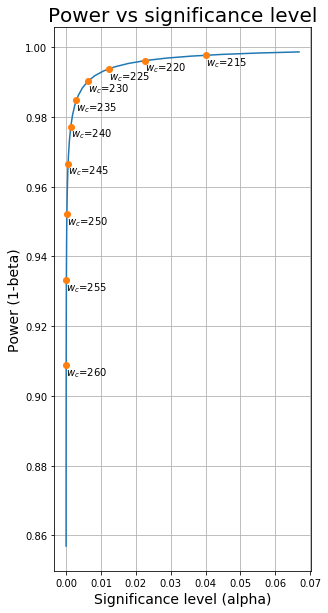

In [9]:
mu0 = 180
sigma0 = 20
mu1 = 300
sigma1 = 30

dw = 30
w = np.arange(mu0 + dw, mu1 - dw, 2)
z0 = (w - mu0)/sigma0
z1 = (w - mu1)/sigma1

alpha = [stats.norm.sf(z) for z in z0]
beta = [stats.norm.cdf(z) for z in z1]    
power = [1 - b for b in beta]

dw = 30
W = np.arange(mu0 + dw, mu1 - dw, 5)
Z0 = (W - mu0)/sigma0
Z1 = (W - mu1)/sigma1

ALPHA = [stats.norm.sf(z) for z in Z0]
BETA = [stats.norm.cdf(z) for z in Z1]    
POWER = [1 - b for b in BETA]



fig, ax = plt.subplots(figsize=(12, 10))

ax.plot(alpha, power)

idxs = slice(1,len(W)-1)
ax.plot(ALPHA[idxs], POWER[idxs], 'o')


for aa, pp, ww in zip(ALPHA[idxs], POWER[idxs], W[idxs]):
    ax.text(aa, pp, f"$w_c$={ww}", horizontalalignment='left', verticalalignment='top')

ax.set_title("Power vs significance level", fontsize=20)
ax.set_xlabel("Significance level (alpha)", fontsize=14)
ax.set_ylabel("Power (1-beta)", fontsize=14)
ax.set_aspect(1)
ax.grid();